# LA Crime Data Analysis

In [37]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/mintaekhong/Downloads/Crime_Data_from_2010_to_Present.csv')

In [3]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,151521112,11/04/2015,11/03/2015,2230,NaN,N Hollywood,1555,330,BURGLARY FROM VEHICLE,0344,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,11100 CAMARILLO ST,NaN,"(34.1577, -118.3727)"
1,151521113,11/04/2015,10/30/2015,200,NaN,N Hollywood,1548,330,BURGLARY FROM VEHICLE,0344 1609 1307,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,11100 CHANDLER BL,NaN,"(34.1681, -118.3724)"
2,151521117,11/04/2015,11/04/2015,1400,NaN,N Hollywood,1506,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0421,...,VERBAL THREAT,JA,Juv Arrest,930.0,NaN,NaN,NaN,7300 BAKMAN AV,NaN,"(34.203, -118.3779)"
3,151521121,11/04/2015,04/28/2015,2125,NaN,N Hollywood,1567,121,"RAPE, FORCIBLE",2000 0429 1241 0416 0400 0527 1813 2002,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,121.0,NaN,NaN,NaN,10700 LANDALE ST,NaN,"(34.1513, -118.3642)"
4,151521123,11/05/2015,10/27/2015,600,NaN,N Hollywood,1515,354,THEFT OF IDENTITY,0100 1822,...,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,11700 LEMAY ST,NaN,"(34.1912, -118.3891)"


In [4]:
print(df.columns)

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')


In [5]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936093 entries, 0 to 1936092
Data columns (total 27 columns):
dr_number                 int64
date_reported             datetime64[ns]
date_occurred             datetime64[ns]
time_occurred             int64
area_id                   float64
area_name                 object
reporting_district        int64
crime_code                int64
crime_code_description    object
mo_codes                  object
victim_age                float64
victim_sex                object
victim_descent            object
premise_code              float64
premise_description       object
weapon_used_code          float64
weapon_description        object
status_code               object
status_description        object
crime_code_1              float64
crime_code_2              float64
crime_code_3              float64
crime_code_4              float64
address                   object
cross_street              object
location_                 object
days_elap

## Exploratory Data Analysis

Text(0.5, 1.0, 'Crime Count by weapon_description')

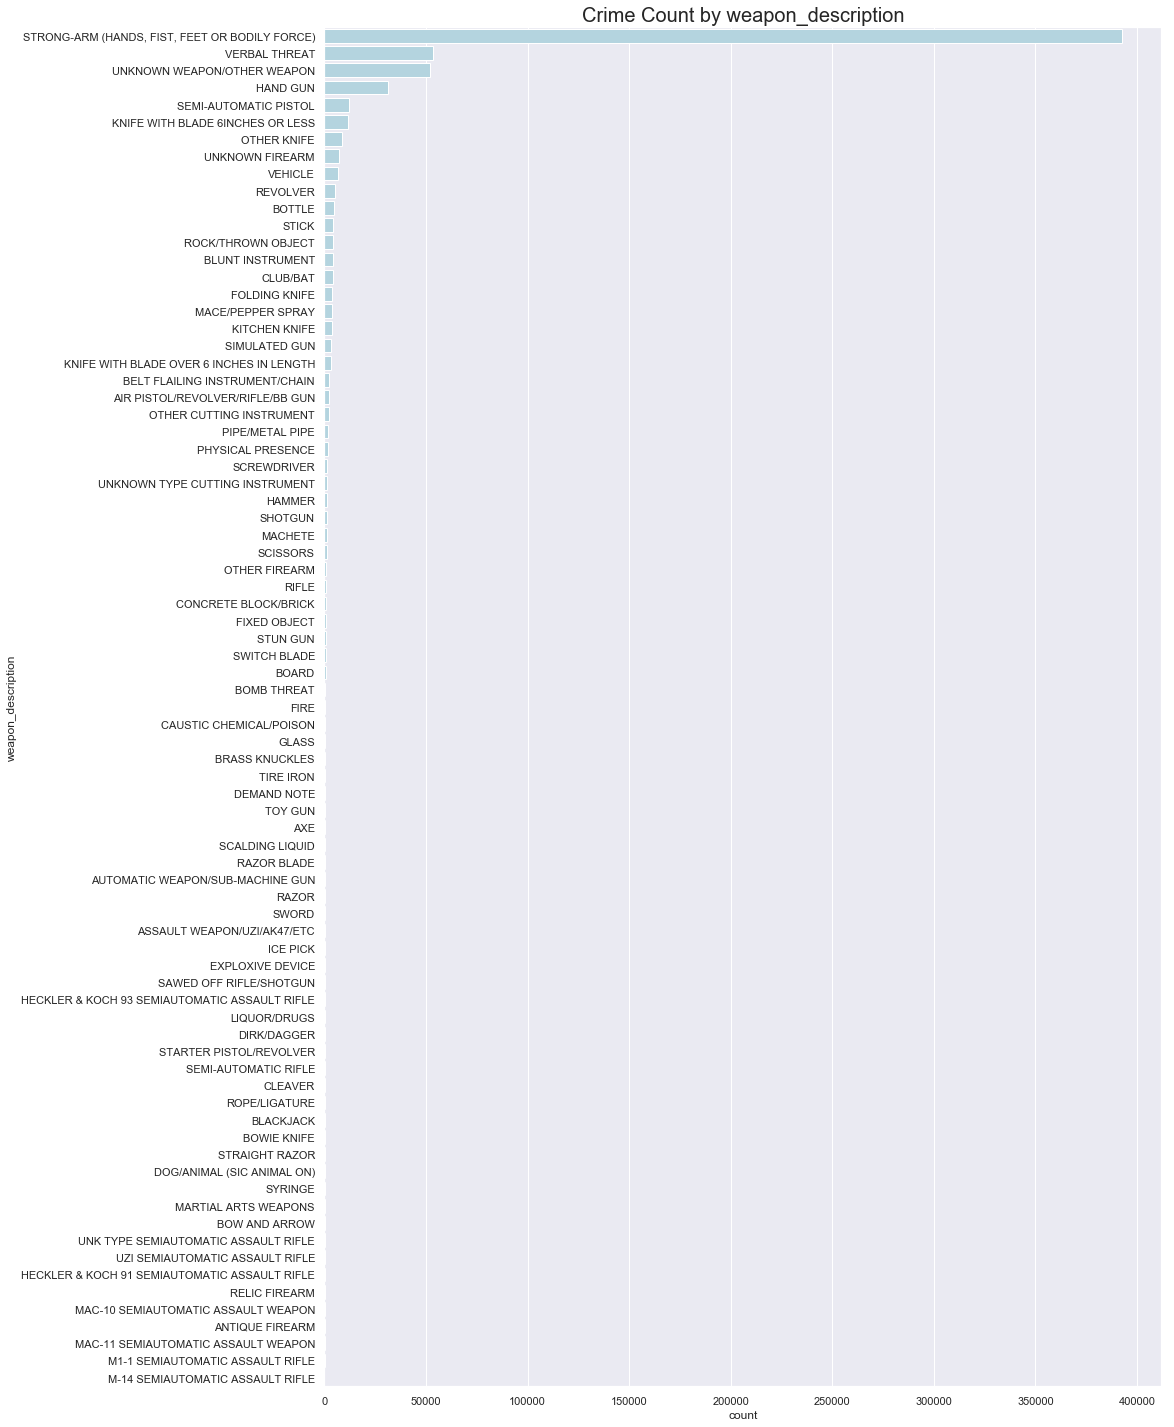

In [30]:
plt.figure(figsize=(15,25))
ax = sns.countplot(y='weapon_description', data = df, order = df['weapon_description'].value_counts().index, color = 'lightblue') #to get in descending order
ax.set_title('Crime Count by weapon_description', fontsize = 20)

Victim Age

Text(0.5, 1.0, 'Victim age distribution')

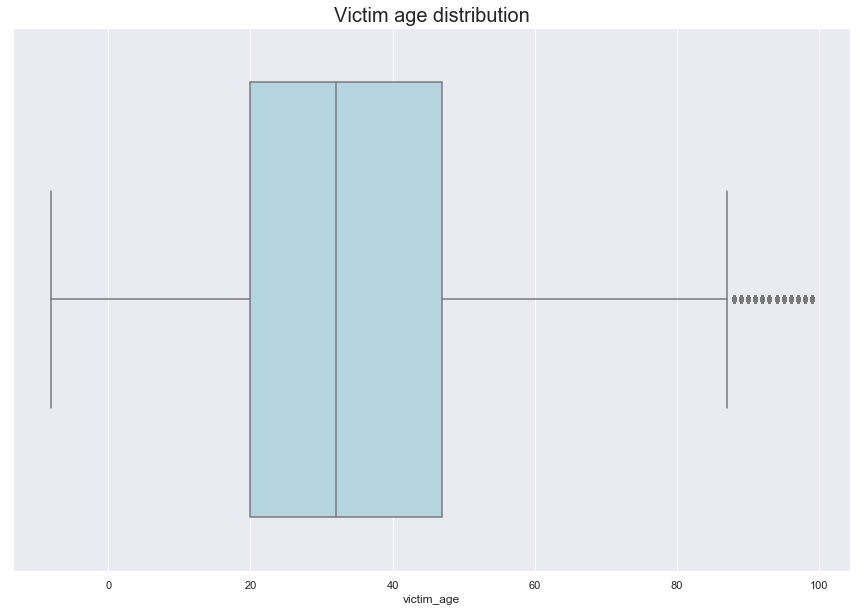

In [55]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = 'victim_age',data = df, color = 'lightblue')
ax.set_title('Victim age distribution', fontsize = 20)

### Victim Sex

In [31]:
df['victim_sex'].value_counts()

M    895244
F    817113
X     42565
H        69
N        17
-         1
Name: victim_sex, dtype: int64

In [59]:
df['victim_sex'].value_counts().index

Index(['M', 'F', 'X', 'H', 'N', '-'], dtype='object')

Text(0.5, 1.0, 'Crime Count by Victim Sex')

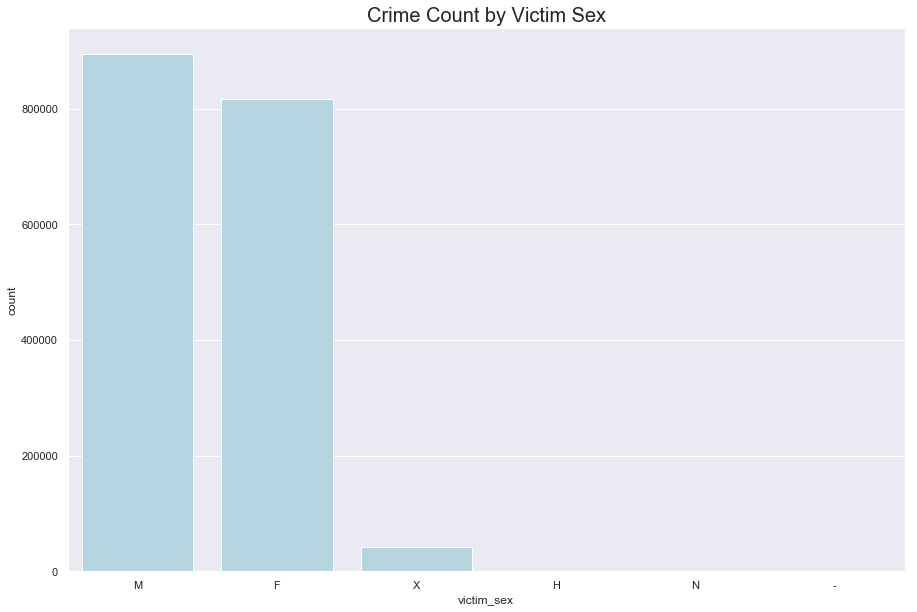

In [60]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x = 'victim_sex',data = df,
                   order = df['victim_sex'].value_counts().index, 
                   color = 'lightblue')
ax.set_title('Crime Count by Victim Sex', fontsize = 20)

### Elapsed days to report a crime

In [7]:
df[['date_reported', 'date_occurred']].head()

,date_reported,date_occurred
0,11/04/2015,11/03/2015
1,11/04/2015,10/30/2015
2,11/04/2015,11/04/2015
3,11/04/2015,04/28/2015
4,11/05/2015,10/27/2015


In [8]:
df['date_reported'] = pd.to_datetime(df.date_reported)

In [9]:
df['date_occurred'] = pd.to_datetime(df.date_occurred)

In [19]:
df['days_elapsed'] = df['date_reported'] - df['date_occurred']

In [20]:
df['days_elapsed'].head()

0     1 days
1     5 days
2     0 days
3   190 days
4     9 days
Name: days_elapsed, dtype: timedelta64[ns]

In [56]:
df[['date_reported', 'days_elapsed']].head()

,date_reported,days_elapsed
0,2015-11-04,1
1,2015-11-04,5
2,2015-11-04,0
3,2015-11-04,190
4,2015-11-05,9


In [21]:
df['days_elapsed'] = df['days_elapsed'].astype('str')

In [22]:
df[['date_reported', 'days_elapsed']].head()

,date_reported,days_elapsed
0,2015-11-04,1 days 00:00:00.000000000
1,2015-11-04,5 days 00:00:00.000000000
2,2015-11-04,0 days 00:00:00.000000000
3,2015-11-04,190 days 00:00:00.000000000
4,2015-11-05,9 days 00:00:00.000000000


In [23]:
df['days_elapsed'] = df['days_elapsed'].map(lambda x: x.split()[0])

In [24]:
df[['date_reported', 'days_elapsed']].head()

,date_reported,days_elapsed
0,2015-11-04,1
1,2015-11-04,5
2,2015-11-04,0
3,2015-11-04,190
4,2015-11-05,9


In [25]:
df['days_elapsed'] = df['days_elapsed'].astype('int')

In [26]:
df_avg_days = pd.DataFrame(df.groupby('crime_code_description')['days_elapsed'].mean())

In [28]:
df_avg_days.reset_index(inplace = True)

In [58]:
df_avg_days.head()

,crime_code_description,days_elapsed
0,ABORTION/ILLEGAL,2.500000
1,ARSON,4.351887
2,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,1.679919
3,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2.586138
4,ATTEMPTED ROBBERY,1.819703


In [ ]:
df['days_elapsed'].value_counts().index

In [67]:
df_avg_days['days_elapsed'].sort_values()

126      0.000000
64       0.000000
65       0.000000
11       0.228571
82       0.272727
81       0.302326
95       0.454545
108      0.543210
48       0.750000
111      0.857143
7        0.860200
72       0.923077
93       0.953196
56       1.000000
38       1.055556
83       1.200000
115      1.240876
100      1.259149
61       1.382775
44       1.613090
104      1.632850
101      1.676867
2        1.679919
105      1.697298
107      1.807219
4        1.819703
53       1.831461
125      1.896717
98       2.025210
134      2.149388
          ...    
36      48.565891
31      49.270531
96      50.607283
50      56.183135
110     57.864849
13      58.666667
30      59.494253
8       61.458145
17      62.233333
58      64.618182
131     68.029412
28      68.546516
45      73.406250
52      84.072289
71      93.333333
92      95.162584
57     100.698408
68     107.087079
116    113.428238
97     118.797712
67     142.735294
10     159.272727
69     162.951807
102    173.492880
109    194

Text(0.5, 1.0, 'Average Days Elapsed per Crime')

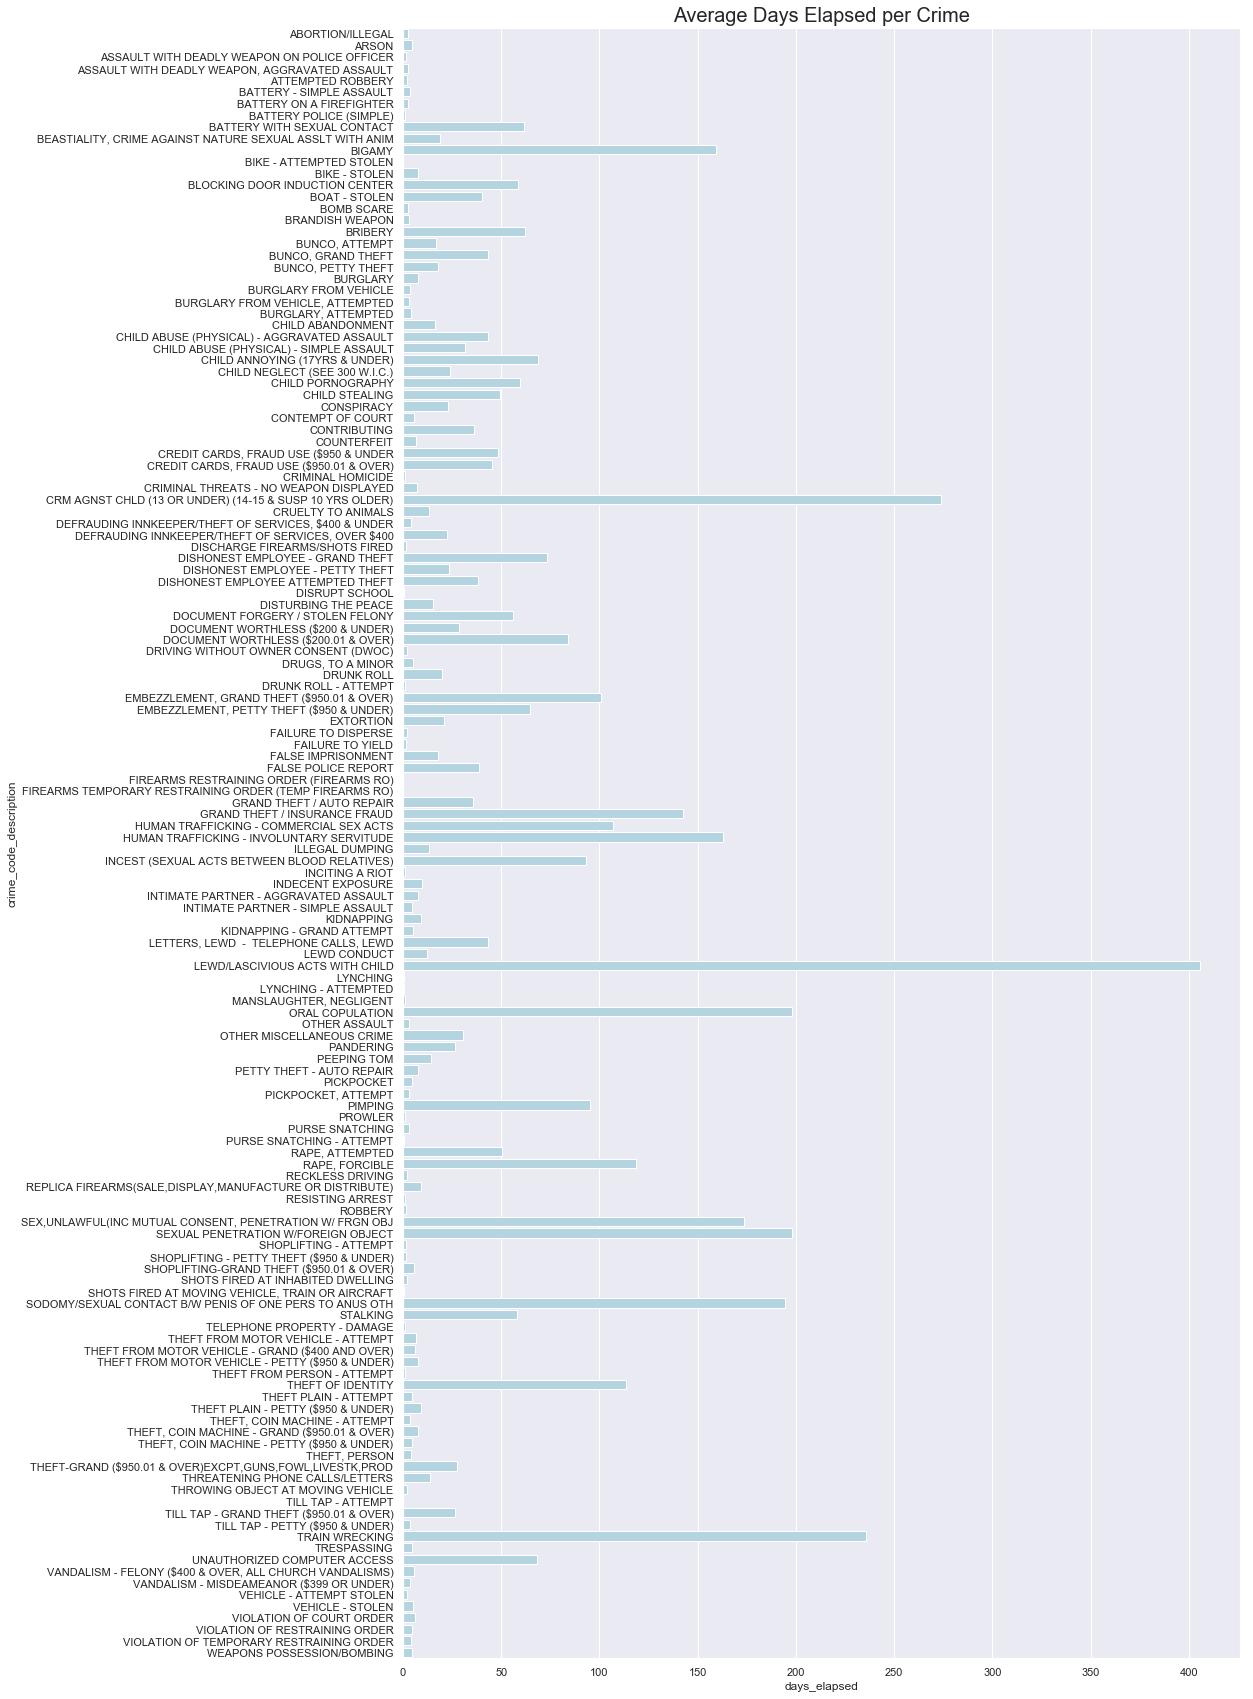

In [68]:
plt.figure(figsize=(15,30))
ax = sns.barplot(x = 'days_elapsed', y='crime_code_description', 
                 data = df_avg_days, 
                 color = 'lightblue')
ax.set_title('Average Days Elapsed per Crime', fontsize = 20)